In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
#transition_exp_hard = np.load('exp_to_hard_matrix.npy')
#transition_exp_med = np.load('exp_to_med_matrix.npy')
transition_exp_easy = np.load('exp_to_easy_matrix.npy')


In [3]:
charts_path = Path(r'C:\Users\cheny\OneDrive\Desktop\jackie_charts\blink-182 - Generational Divide')
expert = np.load(charts_path / 'Expert_simplified.npy')
medium = np.load(charts_path / 'Medium_simplified.npy')
easy = np.load(charts_path / 'Easy_simplified.npy')

In [41]:
ref = {k: v for v, k in enumerate([  1.,   2.,   3.,   4.,   5.,   6.,   7.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  22.,  23.,  24.,  26., 218.])}
ref[0.0] = 20
ref

{1.0: 0,
 2.0: 1,
 3.0: 2,
 4.0: 3,
 5.0: 4,
 6.0: 5,
 7.0: 6,
 10.0: 7,
 11.0: 8,
 13.0: 9,
 14.0: 10,
 15.0: 11,
 16.0: 12,
 17.0: 13,
 19.0: 14,
 22.0: 15,
 23.0: 16,
 24.0: 17,
 26.0: 18,
 218.0: 19,
 0.0: 20}

In [42]:
df = pd.DataFrame(transition_exp_easy, columns =[  1.,   2.,   3.,   4.,   5.,   6.,   7.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  22.,  23.,  24.,  26., 218., 0.])

In [43]:
df
#df.iloc[[8]]

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,11.0,13.0,...,15.0,16.0,17.0,19.0,22.0,23.0,24.0,26.0,218.0,0.0
0,0.134078,0.055866,0.033520,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776536
1,0.119691,0.115830,0.050193,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286
2,0.158672,0.258303,0.055351,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527675
3,0.017316,0.116883,0.077922,0.004329,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.783550
4,0.006803,0.020408,0.496599,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476190
5,0.971831,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028169
6,0.727273,0.272727,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.117647,0.411765,0.117647,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352941
8,0.000000,0.500000,0.250000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
9,0.000000,0.419355,0.290323,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290323


In [44]:
ref

{1.0: 0,
 2.0: 1,
 3.0: 2,
 4.0: 3,
 5.0: 4,
 6.0: 5,
 7.0: 6,
 10.0: 7,
 11.0: 8,
 13.0: 9,
 14.0: 10,
 15.0: 11,
 16.0: 12,
 17.0: 13,
 19.0: 14,
 22.0: 15,
 23.0: 16,
 24.0: 17,
 26.0: 18,
 218.0: 19,
 0.0: 20}

In [16]:
for e in expert:
    if e != 0:
        print(e)
        #here
        cur_note_key = ref[e]
        print(cur_note_key)
        print(np.random.choice(21,replace= True,p= transition_exp_easy[cur_note_key]))

11.0
8
1
11.0
8
20
11.0
8
1
11.0
8
20
11.0
8
1
11.0
8
1
11.0
8
20
11.0
8
1
11.0
8
20
11.0
8
2
10.0
7
20
7.0
6
0
7.0
6
1
7.0
6
0
7.0
6
0
7.0
6
0
7.0
6
0
15.0
11
20
15.0
11
2
15.0
11
2
15.0
11
20
14.0
10
20
2.0
1
20
11.0
8
20
11.0
8
2
11.0
8
20
11.0
8
20
11.0
8
2
11.0
8
1
11.0
8
1
11.0
8
2
11.0
8
1
11.0
8
2
10.0
7
1
7.0
6
0
7.0
6
0
7.0
6
0
7.0
6
1
7.0
6
0
15.0
11
20
15.0
11
20
15.0
11
2
15.0
11
20
14.0
10
1
11.0
8
1
11.0
8
20
11.0
8
2
11.0
8
2
11.0
8
2
11.0
8
2
11.0
8
20
11.0
8
1
11.0
8
1
11.0
8
2
10.0
7
1
7.0
6
1
7.0
6
1
7.0
6
0
7.0
6
0
7.0
6
0
7.0
6
1
15.0
11
20
15.0
11
2
15.0
11
2
15.0
11
20
14.0
10
2
11.0
8
1
11.0
8
20
11.0
8
2
11.0
8
1
11.0
8
1
11.0
8
1
11.0
8
20
11.0
8
2
11.0
8
1
11.0
8
20
10.0
7
1
7.0
6
0
7.0
6
0
7.0
6
0
7.0
6
0
7.0
6
1
7.0
6
0
15.0
11
2
15.0
11
20
15.0
11
2
15.0
11
20
14.0
10
2
11.0
8
1
11.0
8
2
11.0
8
2
11.0
8
1
11.0
8
2
6.0
5
0
6.0
5
0
6.0
5
0
6.0
5
0
6.0
5
0
6.0
5
0
7.0
6
0
7.0
6
0
7.0
6
1
7.0
6
0
7.0
6
0
7.0
6
0
15.0
11
2
15.0
11
20
15.0
11
2
15.0
11
2
14.0
1

In [48]:
rev_note_index_key = {v:k for k, v in ref.items()}

In [58]:
e = 12.0

if e not in ref.keys():
    print('not find')
    e = 0.0
    print(ref[e])
    #print(np.random.choice(21,replace= True,p= transition_exp_easy[e]))
    print(rev_note_index_key[np.random.choice(21,replace= True,p= transition_exp_easy[ref[e]])])
    

not find
20
0.0


In [45]:
transition_exp_easy[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1.])

In [46]:
print(np.random.choice(21,replace= True,p= transition_exp_easy[20]))

20


In [49]:
rev_note_index_key[20]

0.0

In [37]:
#innitiate output note list
output_note_array = []

for i in expert:
    #fill in the 0
    if i == 0:
        output_note_array.append(0)

    else:
        cur_note = i
        #current note to replace -> key
        cur_note_key = ref[cur_note]
        print(cur_note_key)

        #select note from the transition matrix
        #a = number of note keys to choose from,
        #p = prob distribution for the current key 
        
        #np.random.seed(123)

        note_selection = np.random.choice(21,replace= True,p= transition_exp_easy[cur_note_key])
        #print(np.random.get_state())
        print(note_selection)
        #convert note key to note selection
        note_to_replace = rev_note_index_key[note_selection]
        print(note_to_replace)
        #print(note_to_replace)
        #append the note to output array 
        output_note_array.append(note_to_replace)

#convert to numpy array
output_note_array = np.array(output_note_array)

8
20
0.0
8
2
3.0
8
1
2.0
8
20
0.0
8
1
2.0
8
20
0.0
8
1
2.0
8
1
2.0
8
2
3.0
8
20
0.0
7
20
0.0
6
1
2.0
6
0
1.0
6
0
1.0
6
0
1.0
6
0
1.0
6
0
1.0
11
2
3.0
11
20
0.0
11
2
3.0
11
2
3.0
10
2
3.0
1
2
3.0
8
1
2.0
8
20
0.0
8
1
2.0
8
2
3.0
8
2
3.0
8
1
2.0
8
1
2.0
8
20
0.0
8
1
2.0
8
2
3.0
7
20
0.0
6
0
1.0
6
1
2.0
6
0
1.0
6
0
1.0
6
0
1.0
11
2
3.0
11
20
0.0
11
2
3.0
11
20
0.0
10
2
3.0
8
1
2.0
8
1
2.0
8
20
0.0
8
20
0.0
8
1
2.0
8
1
2.0
8
1
2.0
8
20
0.0
8
1
2.0
8
20
0.0
7
20
0.0
6
0
1.0
6
0
1.0
6
0
1.0
6
1
2.0
6
1
2.0
6
1
2.0
11
2
3.0
11
2
3.0
11
20
0.0
11
20
0.0
10
2
3.0
8
1
2.0
8
2
3.0
8
20
0.0
8
20
0.0
8
20
0.0
8
20
0.0
8
20
0.0
8
1
2.0
8
20
0.0
8
1
2.0
7
1
2.0
6
0
1.0
6
1
2.0
6
0
1.0
6
0
1.0
6
0
1.0
6
1
2.0
11
20
0.0
11
2
3.0
11
2
3.0
11
2
3.0
10
1
2.0
8
2
3.0
8
1
2.0
8
2
3.0
8
20
0.0
8
20
0.0
5
0
1.0
5
0
1.0
5
0
1.0
5
0
1.0
5
0
1.0
5
0
1.0
6
0
1.0
6
0
1.0
6
1
2.0
6
0
1.0
6
0
1.0
6
0
1.0
11
20
0.0
11
20
0.0
11
2
3.0
11
20
0.0
10
20
0.0
8
20
0.0
8
20
0.0
8
1
2.0
8
2
3.0
8
1
2.0
8
1
2.0
5
0
1.0
5
0
1.

In [29]:
output_note_array

array([0., 0., 0., ..., 0., 0., 1.])

In [35]:
 np.count_nonzero(expert==0)

4874

In [38]:
# count zeros in 1d array
n_zeros = np.count_nonzero(output_note_array==0)
# display the count of zeros
print(n_zeros)

4925


Single Song 

In [182]:

'''
transition_matrix: the distribution for the notes to convert (to hard, to medium, to easy)
expert: the expert note chart to convert

output: a numpy array for the transition notes
'''
def difficulty_convertion(transition_matrix, expert):
    #converting to note from index key
    rev_note_index_key = {v:k for k, v in ref.items()

    #innitiate output note list
    output_note_array = []

    for i in expert:
        #fill in the 0
        if i == 0:
            output_note_array.append(0)

        else:
            cur_note = i
            #current note to replace -> key
            cur_note_key = ref[cur_note]

            #select note from the transition matrix
            #a = number of note keys to choose from,
            #p = prob distribution for the current key 
            note_selection = np.random.choice(21,replace= True,p= transition_matrix[cur_note_key])
            #convert note key to note selection
            note_to_replace = rev_note_index_key[note_selection]
            #print(note_to_replace)
            #append the note to output array 
            output_note_array.append(note_to_replace)
    
    #convert to numpy array
    output_note_array = np.array(output_note_array)

    return output_note_array
        

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
sys.path.insert(1, str(Path.cwd().parent))
from tensor_hero.visualization import slice_notes, plot_chart
from tensor_hero.difficulty_conversion import difficulty_conversion

In [11]:
easy_1 = difficulty_conversion('hard', expert)

In [12]:
print(np.count_nonzero(expert==0))
print(np.count_nonzero(easy_1==0))

4874
4884


<Figure size 720x360 with 0 Axes>

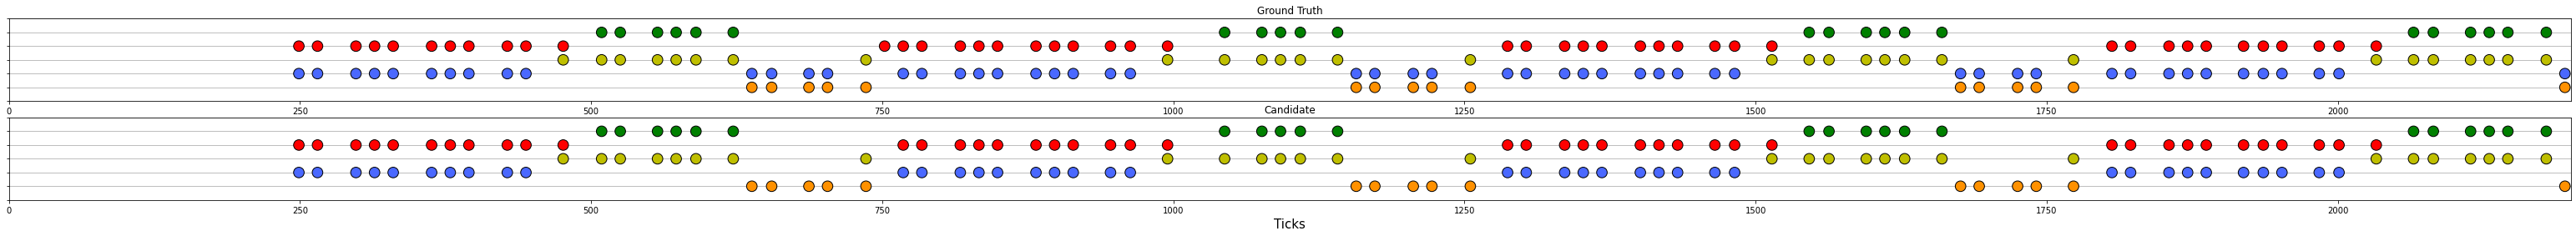

In [13]:
plt.figure(figsize=(10, 5))
_ = plot_chart(slice_notes(expert,0,22), slice_notes(easy_1,0,22))